# Assingment 8 Network Analysis 

In [56]:
# for this assignment i will be using the play ' Othello'

In [57]:
import requests
import re
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from bs4 import BeautifulSoup

In [58]:
response = requests.get('https://www.gutenberg.org/ebooks/1531.txt.utf-8')
response

<Response [200]>

In [59]:
othello = response.text

In [60]:
# search for the number of acts in 'Othello'

othello_acts = othello.split('ACT')[6:11]

len(othello_acts)

5

In [61]:
characters = ['DUKE OF VENICE','BRABANTIO','GRATIANO','LODOVICO','OTHELLO','CASSIO','IAGO','MONTANO','RODERIGO','CLOWN','DESDEMONA','EMILIA','BIANCA']

In [62]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for h in range(i+1,len(characters)):
        connections[(characters[i],characters[h])] = 0

for m in characters:
    charnum[m] = 0

for i in othello_acts:
    for h in i.split('SCENE')[1:]:
        scenechars = []
        for m in characters:
            if h.find(m) != -1:
                scenechars.append(m)
                charnum[m] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [63]:
# this is the number of appearances 

charnum

{'DUKE OF VENICE': 0,
 'BRABANTIO': 3,
 'GRATIANO': 2,
 'LODOVICO': 4,
 'OTHELLO': 12,
 'CASSIO': 9,
 'IAGO': 13,
 'MONTANO': 3,
 'RODERIGO': 7,
 'CLOWN': 2,
 'DESDEMONA': 9,
 'EMILIA': 8,
 'BIANCA': 3}

In [64]:
# Character Connections/Interactions with other Characters 

connections

{('DUKE OF VENICE', 'BRABANTIO'): 0,
 ('DUKE OF VENICE', 'GRATIANO'): 0,
 ('DUKE OF VENICE', 'LODOVICO'): 0,
 ('DUKE OF VENICE', 'OTHELLO'): 0,
 ('DUKE OF VENICE', 'CASSIO'): 0,
 ('DUKE OF VENICE', 'IAGO'): 0,
 ('DUKE OF VENICE', 'MONTANO'): 0,
 ('DUKE OF VENICE', 'RODERIGO'): 0,
 ('DUKE OF VENICE', 'CLOWN'): 0,
 ('DUKE OF VENICE', 'DESDEMONA'): 0,
 ('DUKE OF VENICE', 'EMILIA'): 0,
 ('DUKE OF VENICE', 'BIANCA'): 0,
 ('BRABANTIO', 'GRATIANO'): 0,
 ('BRABANTIO', 'LODOVICO'): 0,
 ('BRABANTIO', 'OTHELLO'): 2,
 ('BRABANTIO', 'CASSIO'): 1,
 ('BRABANTIO', 'IAGO'): 3,
 ('BRABANTIO', 'MONTANO'): 0,
 ('BRABANTIO', 'RODERIGO'): 3,
 ('BRABANTIO', 'CLOWN'): 0,
 ('BRABANTIO', 'DESDEMONA'): 1,
 ('BRABANTIO', 'EMILIA'): 0,
 ('BRABANTIO', 'BIANCA'): 0,
 ('GRATIANO', 'LODOVICO'): 2,
 ('GRATIANO', 'OTHELLO'): 2,
 ('GRATIANO', 'CASSIO'): 2,
 ('GRATIANO', 'IAGO'): 2,
 ('GRATIANO', 'MONTANO'): 1,
 ('GRATIANO', 'RODERIGO'): 1,
 ('GRATIANO', 'CLOWN'): 0,
 ('GRATIANO', 'DESDEMONA'): 1,
 ('GRATIANO', 'EMILIA'):

In [65]:

for m,v in charnum.items():
    print(m,v)

DUKE OF VENICE 0
BRABANTIO 3
GRATIANO 2
LODOVICO 4
OTHELLO 12
CASSIO 9
IAGO 13
MONTANO 3
RODERIGO 7
CLOWN 2
DESDEMONA 9
EMILIA 8
BIANCA 3


In [66]:
# importing from networkx using girvan_newman

from networkx.algorithms.community.centrality import girvan_newman

In [67]:
nxgraphitems = []

for m,v in connections.items():
    if v != 0:
        dashedge = (m[0],m[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('BRABANTIO', 'OTHELLO'),
 ('BRABANTIO', 'CASSIO'),
 ('BRABANTIO', 'IAGO'),
 ('BRABANTIO', 'RODERIGO'),
 ('BRABANTIO', 'DESDEMONA'),
 ('GRATIANO', 'LODOVICO'),
 ('GRATIANO', 'OTHELLO'),
 ('GRATIANO', 'CASSIO'),
 ('GRATIANO', 'IAGO'),
 ('GRATIANO', 'MONTANO'),
 ('GRATIANO', 'RODERIGO'),
 ('GRATIANO', 'DESDEMONA'),
 ('GRATIANO', 'EMILIA'),
 ('GRATIANO', 'BIANCA'),
 ('LODOVICO', 'OTHELLO'),
 ('LODOVICO', 'CASSIO'),
 ('LODOVICO', 'IAGO'),
 ('LODOVICO', 'MONTANO'),
 ('LODOVICO', 'RODERIGO'),
 ('LODOVICO', 'DESDEMONA'),
 ('LODOVICO', 'EMILIA'),
 ('LODOVICO', 'BIANCA'),
 ('OTHELLO', 'CASSIO'),
 ('OTHELLO', 'IAGO'),
 ('OTHELLO', 'MONTANO'),
 ('OTHELLO', 'RODERIGO'),
 ('OTHELLO', 'CLOWN'),
 ('OTHELLO', 'DESDEMONA'),
 ('OTHELLO', 'EMILIA'),
 ('OTHELLO', 'BIANCA'),
 ('CASSIO', 'IAGO'),
 ('CASSIO', 'MONTANO'),
 ('CASSIO', 'RODERIGO'),
 ('CASSIO', 'CLOWN'),
 ('CASSIO', 'DESDEMONA'),
 ('CASSIO', 'EMILIA'),
 ('CASSIO', 'BIANCA'),
 ('IAGO', 'MONTANO'),
 ('IAGO', 'RODERIGO'),
 ('IAGO', 'CLOWN'),
 ('IA

In [68]:
G = nx.Graph()

In [69]:
G.add_edges_from(nxgraphitems)

In [70]:
G.nodes

NodeView(('BRABANTIO', 'OTHELLO', 'CASSIO', 'IAGO', 'RODERIGO', 'DESDEMONA', 'GRATIANO', 'LODOVICO', 'MONTANO', 'EMILIA', 'BIANCA', 'CLOWN'))

In [71]:
communities = girvan_newman(G)

[['BRABANTIO'], ['BIANCA', 'RODERIGO', 'CLOWN', 'IAGO', 'GRATIANO', 'OTHELLO', 'DESDEMONA', 'EMILIA', 'LODOVICO', 'CASSIO', 'MONTANO']]


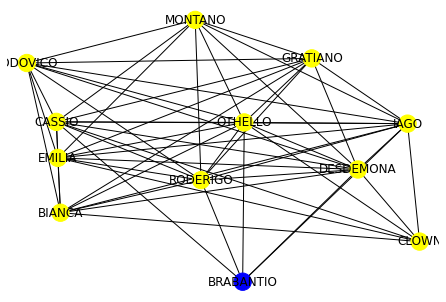

In [72]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('yellow')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

# Character Network Analysis from 'Othello'
This visualization demosntrastes that Iago has the most connections since his cirlce is the biggest and his edgest are thicker than the other characters in the visual. This demonstrates that Inago is the most relevant character. 

Othello is next to Iago in terms of the amount of connections. Cassio and Desdemona follow Othello.

Essentially, Iago, Othello, Cassio, and Desdemona are the characters with the most connections.

This makes sense since the story of Othello revolves around these four characters the most.

In [73]:
nx.density(G)

0.8333333333333334

In [74]:
nx.degree_centrality(G)

{'BRABANTIO': 0.4545454545454546,
 'OTHELLO': 1.0,
 'CASSIO': 1.0,
 'IAGO': 1.0,
 'RODERIGO': 0.9090909090909092,
 'DESDEMONA': 1.0,
 'GRATIANO': 0.8181818181818182,
 'LODOVICO': 0.8181818181818182,
 'MONTANO': 0.7272727272727273,
 'EMILIA': 0.9090909090909092,
 'BIANCA': 0.8181818181818182,
 'CLOWN': 0.5454545454545454}

In [75]:
nx.betweenness_centrality(G)

{'BRABANTIO': 0.0,
 'OTHELLO': 0.03772727272727273,
 'CASSIO': 0.03772727272727273,
 'IAGO': 0.03772727272727273,
 'RODERIGO': 0.020454545454545454,
 'DESDEMONA': 0.03772727272727273,
 'GRATIANO': 0.0022727272727272726,
 'LODOVICO': 0.0022727272727272726,
 'MONTANO': 0.0,
 'EMILIA': 0.014999999999999998,
 'BIANCA': 0.00909090909090909,
 'CLOWN': 0.0}

# Degree of Centrality analysis 
This network visualizations depicts all the speaking characters and their interactions with each other within Shakespeare's play 'Othello'.

According to our network visualization,the 3 most important nodes are Othello, Cassio, Iago, and Desdamonda.
highest degree centrality of (1.0, 1.0, 1.0) In other words, these are the characters that seem to have the most interactions with the other characters and are a vital part of the social network within the play, this makes sense becuase the majority of the play revolves around the dynamic of these characters the most. 

The next most important nodes are Rodrigo and Emilia with a degree centrality of 0.909.